# Modelo Perros y Gatos

## Cargamos los datos y descomprimimos el ZIP



In [ ]:
#generamos la conexion con Google Drive

from google.colab import drive
drive.mount('/content/drive')

#importamos librerias

import zipfile
import os
from sklearn.model_selection import train_test_split
import cv2
import glob as gb
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation, RandomHeight, RandomWidth
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import keras

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/TrabajoDeepLearning/

CatsAndDogs.zip


In [ ]:
# Defino variables

zip = '/content/drive/MyDrive/TrabajoDeepLearning/CatsAndDogs.zip'
extracted_zip = '/content/drive/MyDrive/TrabajoDeepLearning'

# Descomprimir el archivo ZIP

with zipfile.ZipFile(zip, 'r') as zip_ref:
    zip_ref.extractall(extracted_zip)


In [ ]:
train_folder = '/content/drive/MyDrive/TrabajoDeepLearning/train'

In [ ]:
# Chequeamos la cantidad de imagenes extraidas

archivo = os.listdir(train_folder)
print(len(archivo))

25000


## Preprocesamiento de imagenes

Para poder entrenar el modelo, normalizamos los datos dandole el tamaño recomendado por el profesor (180x180), para luego almacenar la imagen procesada en el array X y la etiqueta en el array Y. Usaremos el codigo recomendado por el profesor en la ppt.



```
img = cv2.imread(nombrearchivo)
img_mtx = cv2.resize(img, (180,180))
```



In [ ]:
# Creamos listas vacías para almacenar las imágenes procesadas (array X), las etiquetas de las imagenes (array Y) y los títulos (array Titulo)
X = []
Y = []
titulo = []

# Buscamos los archivos JPG en el directorio de entrenamiento

files = gb.glob(pathname=str(train_folder + '/*.jpg'))

for nombrearchivo in files:

    image = cv2.imread(nombrearchivo)

    # Redimensionar la imagen a 180x180 píxeles

    image_array = cv2.resize(image, (180,180))

    # Agregar la imagen procesada a la lista X

    X.append(image_array)

    # Obtener el nombre del archivo y extraer 'cat' o 'dog'

    nombrearchivo = nombrearchivo.split('/')[-1] #obtiene el nombre de la ruta y lo splitea por '/', lo que nos permite sacar solo el nombre del archivo, por ejemplo "dog.101.jpg"
    sep = nombrearchivo.split('.')[0] #ahora splitea el nombre del archivo "dog.101.jpg" en []'dog', '101', 'jpg']. Y en consecuencia, nos permite obtener la etiqueta de la imagen.

    # Agregar el título a la lista Titulo

    titulo.append(sep) #si por ejemplo tu imagen tiene nombre "dog.101.jpg", esto va a almacenar en titulos "dog"

    # Agregar 1 si es 'dog', 0 si es 'cat'

    if sep == 'dog':
        Y.append(1)
    else:
        Y.append(0)




In [ ]:
# Convertir las listas X e Y a arrays de numpy para que sean compatibles con el modelo que vamos a crear

X = np.array(X)
Y = np.array(Y)

In [ ]:
# Chequeamos que efectivamente el tamaño de la imagen quedo como queriamos para el array X (180*180) y chequemos que el nro de imagenes sea 25,000. Deberiamos obtener algo asi: (25000,180,180,3). El 3 corresponde al RGB.

X.shape

(25000, 180, 180, 3)

In [ ]:
# Ahora vamos a dividir nuestro dataset en train y test usando scikitlearn.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #aca podriamos usar random_state = 42, pero nos parece mejor hacer un shuffle luego.


In [ ]:
X_train.shape

(20000, 180, 180, 3)

In [ ]:
y_train.shape

(20000,)

In [ ]:
# Ahora haremos el shuffle, para darle aleatoriedad a los datasets de entrenamiento, para que no nos queden todos los perros juntos y todos los gatos juntos.

# Hacemos el shuffle de los datos de entrenamiento

X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Realizamos one hot encoding

y_train=tf.one_hot(y_train,2)
y_test=tf.one_hot(y_test,2)


## Creacion del modelo

No logré poder usar las sugerencias del profesor, ya que me daba un error. Entonces decidi sacarlo.

In [ ]:
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, BatchNormalization, GlobalMaxPool2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation, RandomHeight, RandomWidth
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import keras
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = Sequential()

# Capas convolucionales y de pooling

model.add(Conv2D(32, kernel_size =(3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size =(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size =(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size =(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(GlobalMaxPool2D())

#Capas densas

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capa de salida con dos neuronas ya que es perro o gato.

model.add(Dense(units = 2, activation = 'softmax')),

(None,)

In [ ]:
# Compilamos el modelo

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Mostrar la arquitectura del modelo

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 87, 87, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 256)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 524,994 (2.00 MB)

 Trainable params: 523,010 (2.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
#ahora vamos a implementar los callbacks

# Definimos EarlyStopping: Detener el entrenamiento si la métrica de monitoreo no mejora después de 10 epochs

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

#ReduceLROnPlateau: Reducir la tasa de aprendizaje si la métrica de accuracy no mejora

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', initial_learning_rate=0.0001, patience = 2, verbose = 1, factor = 0.25, min_lr = 0.00001)

# Lista con callbacks

callbacks = [early_stopping, reduce_lr]

## Entrenamiento del modelo

In [ ]:
# Entrenamos el modelo de deep learning

history = model.fit(X_train, y_train, epochs=50, batch_size=32,verbose=1, callbacks=[callbacks], validation_data=(X_test, y_test))


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.5766 - loss: 0.8023 - val_accuracy: 0.5860 - val_loss: 0.6486 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7072 - loss: 0.5631 - val_accuracy: 0.7588 - val_loss: 0.4871 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7836 - loss: 0.4540 - val_accuracy: 0.7680 - val_loss: 0.4795 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8196 - loss: 0.3930 - val_accuracy: 0.7874 - val_loss: 0.4237 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8548 - loss: 0.3294 - val_accuracy: 0.8706 - val_loss: 0.3177 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8723 - loss: 0.2945 - val_accuracy: 0.8862 - val_loss: 0.2770 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8932 - l

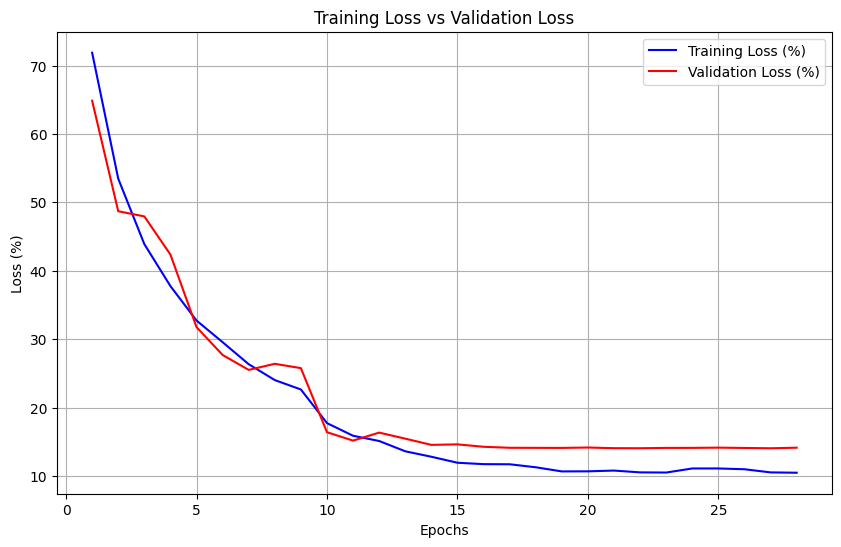

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#graficaremos la funcion de perdida en training y en validation para ver el rendimiento de nuestro modelo.

# Extraer los valores de loss y val_loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Convertir las pérdidas a porcentaje
train_loss_percentage = [loss * 100 for loss in train_loss]
val_loss_percentage = [loss * 100 for loss in val_loss]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss_percentage, 'b', label='Training Loss (%)')
plt.plot(epochs, val_loss_percentage, 'r', label='Validation Loss (%)')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.legend()
plt.grid(True)
plt.show()


## Poniendo en marcha el modelo.

Lo haremos hacer predicciones para evaluar su rendimiento.

In [ ]:
# Ejecutamos la prediccion del modelo

y_pred = model.predict(X_test)

print(y_pred.shape)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
(5000, 2)


In [ ]:
# Comparo imágenes reales junto con sus predicciones

# Primero configuramos el tamaño (filas y columnas) de las fotos que vamos a mostrar.

plt.figure(figsize=(20, 20))

# Función que recibe una predicción y crea una etiqueta de texto (0 si es Gato, 1 si es perro). Para que devuelva una etiqueta y no un numero (0 o 1).
#Optamos por lambda porque es una funcion hiper sencilla.

labels = lambda n: 'Dog' if n == 1 else 'Cat'


# Iterar sobre 36 índices aleatorios para mostrar imágenes del conjunto de prueba

for n, i in enumerate(np.random.randint(0, len(X_test), 36)):

    # Crear un subplot de 6x6
    plt.subplot(6, 6, n + 1)
    #mostrar la imagen
    plt.imshow(keras.preprocessing.image.array_to_img(X_test[i]))
    #oculta los ejes
    plt.axis('off')

    # Crear las etiquetas de probabilidad con formato simplificado
    tcat, tdog = str(y_pred[i][0])[-4:], str(y_pred[i][1])[:3]
    tdog += ' ' + str(y_pred[i][1])[-4:] if 'e' in str(y_pred[i][1]) else ''

    # Configurar el título con la etiqueta de predicción y las probabilidades
    plt.title(f"{labels(np.argmax(y_pred[i]))} {tcat}/{tdog}")

# Mostrar todas las imágenes con sus títulos en una cuadrícula 6x6
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Probamos con imagenes reales

Para darle un uso real al programa, lo testeamos con imagenes reales.

Resulta que soy muy fan de un perrito de Instagram que se llama Diego (@bulldogpabs en instagram) asi que lo usaré para testear el modelo.

Ademas, la semana pasada fui a la casa de mi abuela y le saque unas fotos a su perra y las usaré para testear el modelo tambien.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/TrabajoDeepLearning/

CatsAndDogs.zip  train


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


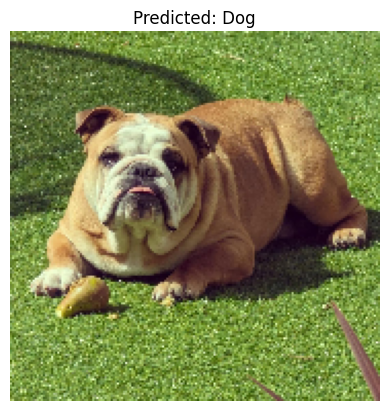

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


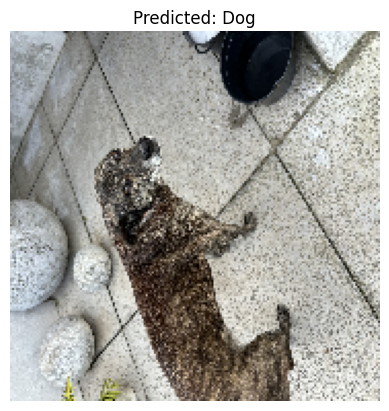

In [ ]:
from tensorflow.keras.preprocessing import image

# Función para cargar, preprocesar y predecir la clase de una imagen

def predict_image(img_path, model):

    # Cargar la imagen y redimensionarla al tamaño utilizado durante el entrenamiento (180x180 píxeles)

    img = image.load_img(img_path, target_size=(180, 180))

    # Convertir la imagen a un array numpy

    img_array = image.img_to_array(img)

    # Expandir dimensiones para que coincida con el formato de entrada del modelo (lote de 1)

    img_array = np.expand_dims(img_array, axis=0)

    # Normalizar la imagen (escalar los valores de los píxeles entre 0 y 1)

    img_array /= 255.0

    # Realizar la predicción con el modelo

    prediction = model.predict(img_array)

    # Acceder al valor numérico de la predicción

    predicted_value = prediction[0][0]

    # Determinar la clase predicha (0 = Cat, 1 = Dog)

    class_name = 'Dog' if predicted_value > 0.5 else 'Cat'

    # Mostrar la imagen y la predicción

    plt.imshow(img)
    plt.title(f'Predicted: {class_name}')
    plt.axis('off')
    plt.show()

# Lista de imágenes en la carpeta para probar

image_paths = ['/content/Diego.jpeg.jpeg', '/content/Zaida.jpg']

# Probar cada imagen en la lista

for img_path in image_paths:
    predict_image(img_path, model)

